In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_dir='/content/drive/MyDrive/AI in Healthcare/Alzheimer_data'

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=20,
                                 width_shift_range=0.2,zoom_range=0.2, horizontal_flip=True,
                                 validation_split=0.2)

In [7]:
train_generator=train_datagen.flow_from_directory(data_dir, target_size=(224,224),batch_size=32, class_mode='categorical',subset='training')

validation_generator=train_datagen.flow_from_directory(data_dir, target_size=(224,224),batch_size=32, class_mode='categorical',subset='validation')

Found 26 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_generator,epochs=50,validation_data=validation_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.3077 - loss: 1.3793 - val_accuracy: 0.2500 - val_loss: 1.4392
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step - accuracy: 0.2692 - loss: 1.8015 - val_accuracy: 0.5000 - val_loss: 1.7919
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2308 - loss: 1.9784 - val_accuracy: 0.2500 - val_loss: 1.5292
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - accuracy: 0.1538 - loss: 1.3948 - val_accuracy: 0.2500 - val_loss: 1.3694
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step - accuracy: 0.3077 - loss: 1.3233 - val_accuracy: 0.5000 - val_loss: 1.3313
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - accuracy: 0.5000 - loss: 1.3560 - val_accuracy: 0.7500 - val_loss: 1.3430
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.4231 - loss: 1.3485 - val_accuracy: 0.2500 - val_loss: 1.3308
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step - accuracy: 0.2692 - loss: 1.3509 - val_accuracy: 0.2500 - val_loss: 1.3462
Epoch 9

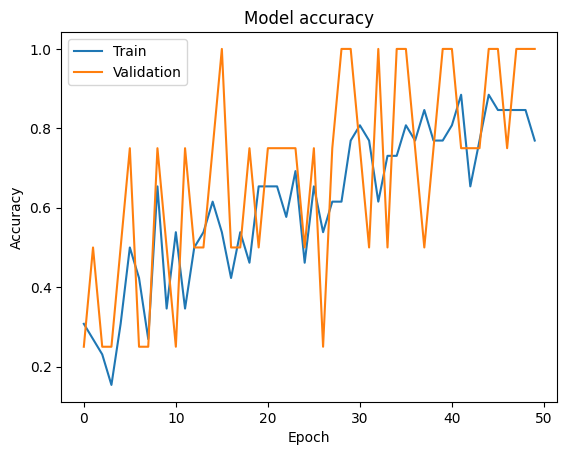

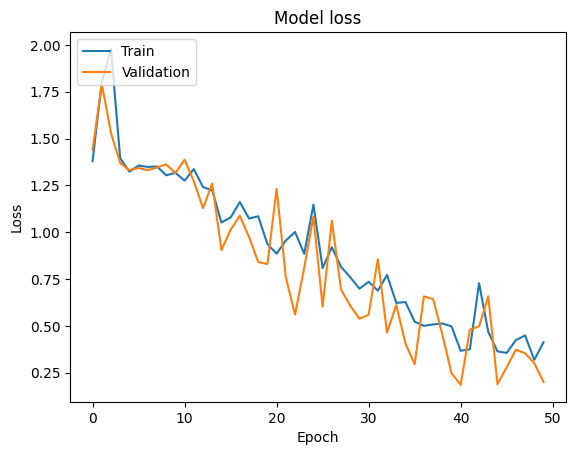

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
val_loss,val_acc=model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc*100:2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 1.0000 - loss: 0.3484
Validation Accuracy: 100.000000


In [13]:
y_pred=model.predict(validation_generator)
y_pred=np.argmax(y_pred,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


In [14]:
cm=confusion_matrix(validation_generator.classes,y_pred)
class_labels=list(train_generator.class_indices.keys())

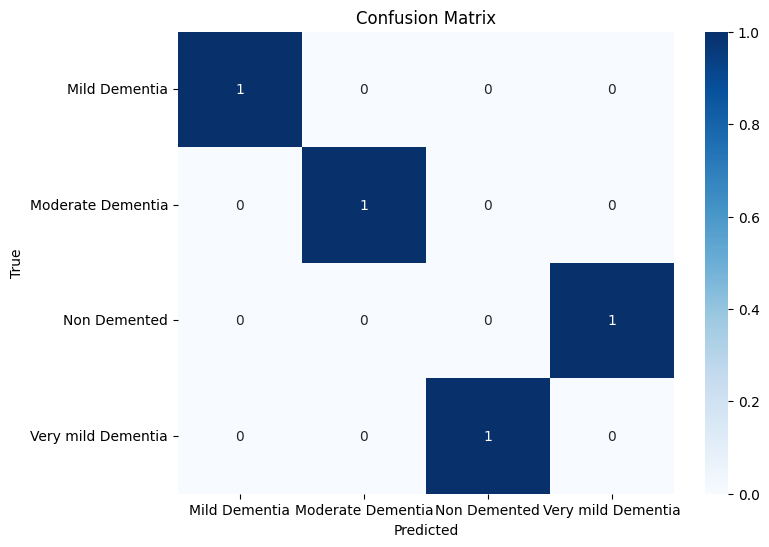

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_labels,yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
print(classification_report(validation_generator.classes,y_pred,target_names=class_labels))

                    precision    recall  f1-score   support

     Mild Dementia       1.00      1.00      1.00         1
 Moderate Dementia       1.00      1.00      1.00         1
      Non Demented       0.00      0.00      0.00         1
Very mild Dementia       0.00      0.00      0.00         1

          accuracy                           0.50         4
         macro avg       0.50      0.50      0.50         4
      weighted avg       0.50      0.50      0.50         4

